<a href="https://colab.research.google.com/github/jungcha/Complete-Python-3-Bootcamp/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow:", tf.__version__)
print("TF Hub Version:", hub.__version__)
print("GPU", "available(yes)" if tf.config.list_physical_devices("GPU") else "not available")


Tensorflow: 2.2.0-rc3
TF Hub Version: 0.8.0
GPU available(yes)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!unzip "/content/gdrive/My Drive/Dog Vision /dog-breed-identification.zip" -d "/content/gdrive/My Drive/Dog Vision /"

Archive:  /content/gdrive/My Drive/Dog Vision /dog-breed-identification.zip
replace /content/gdrive/My Drive/Dog Vision /labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import pandas as pd
labels_csv = pd.read_csv("/content/gdrive/My Drive/Dog Vision /labels.csv")
print(labels_csv.describe())
print(labels_csv.head())



                                      id               breed
count                              10222               10222
unique                             10222                 120
top     8ff0a26e39535edfde6fb02bdd83e9ad  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [0]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

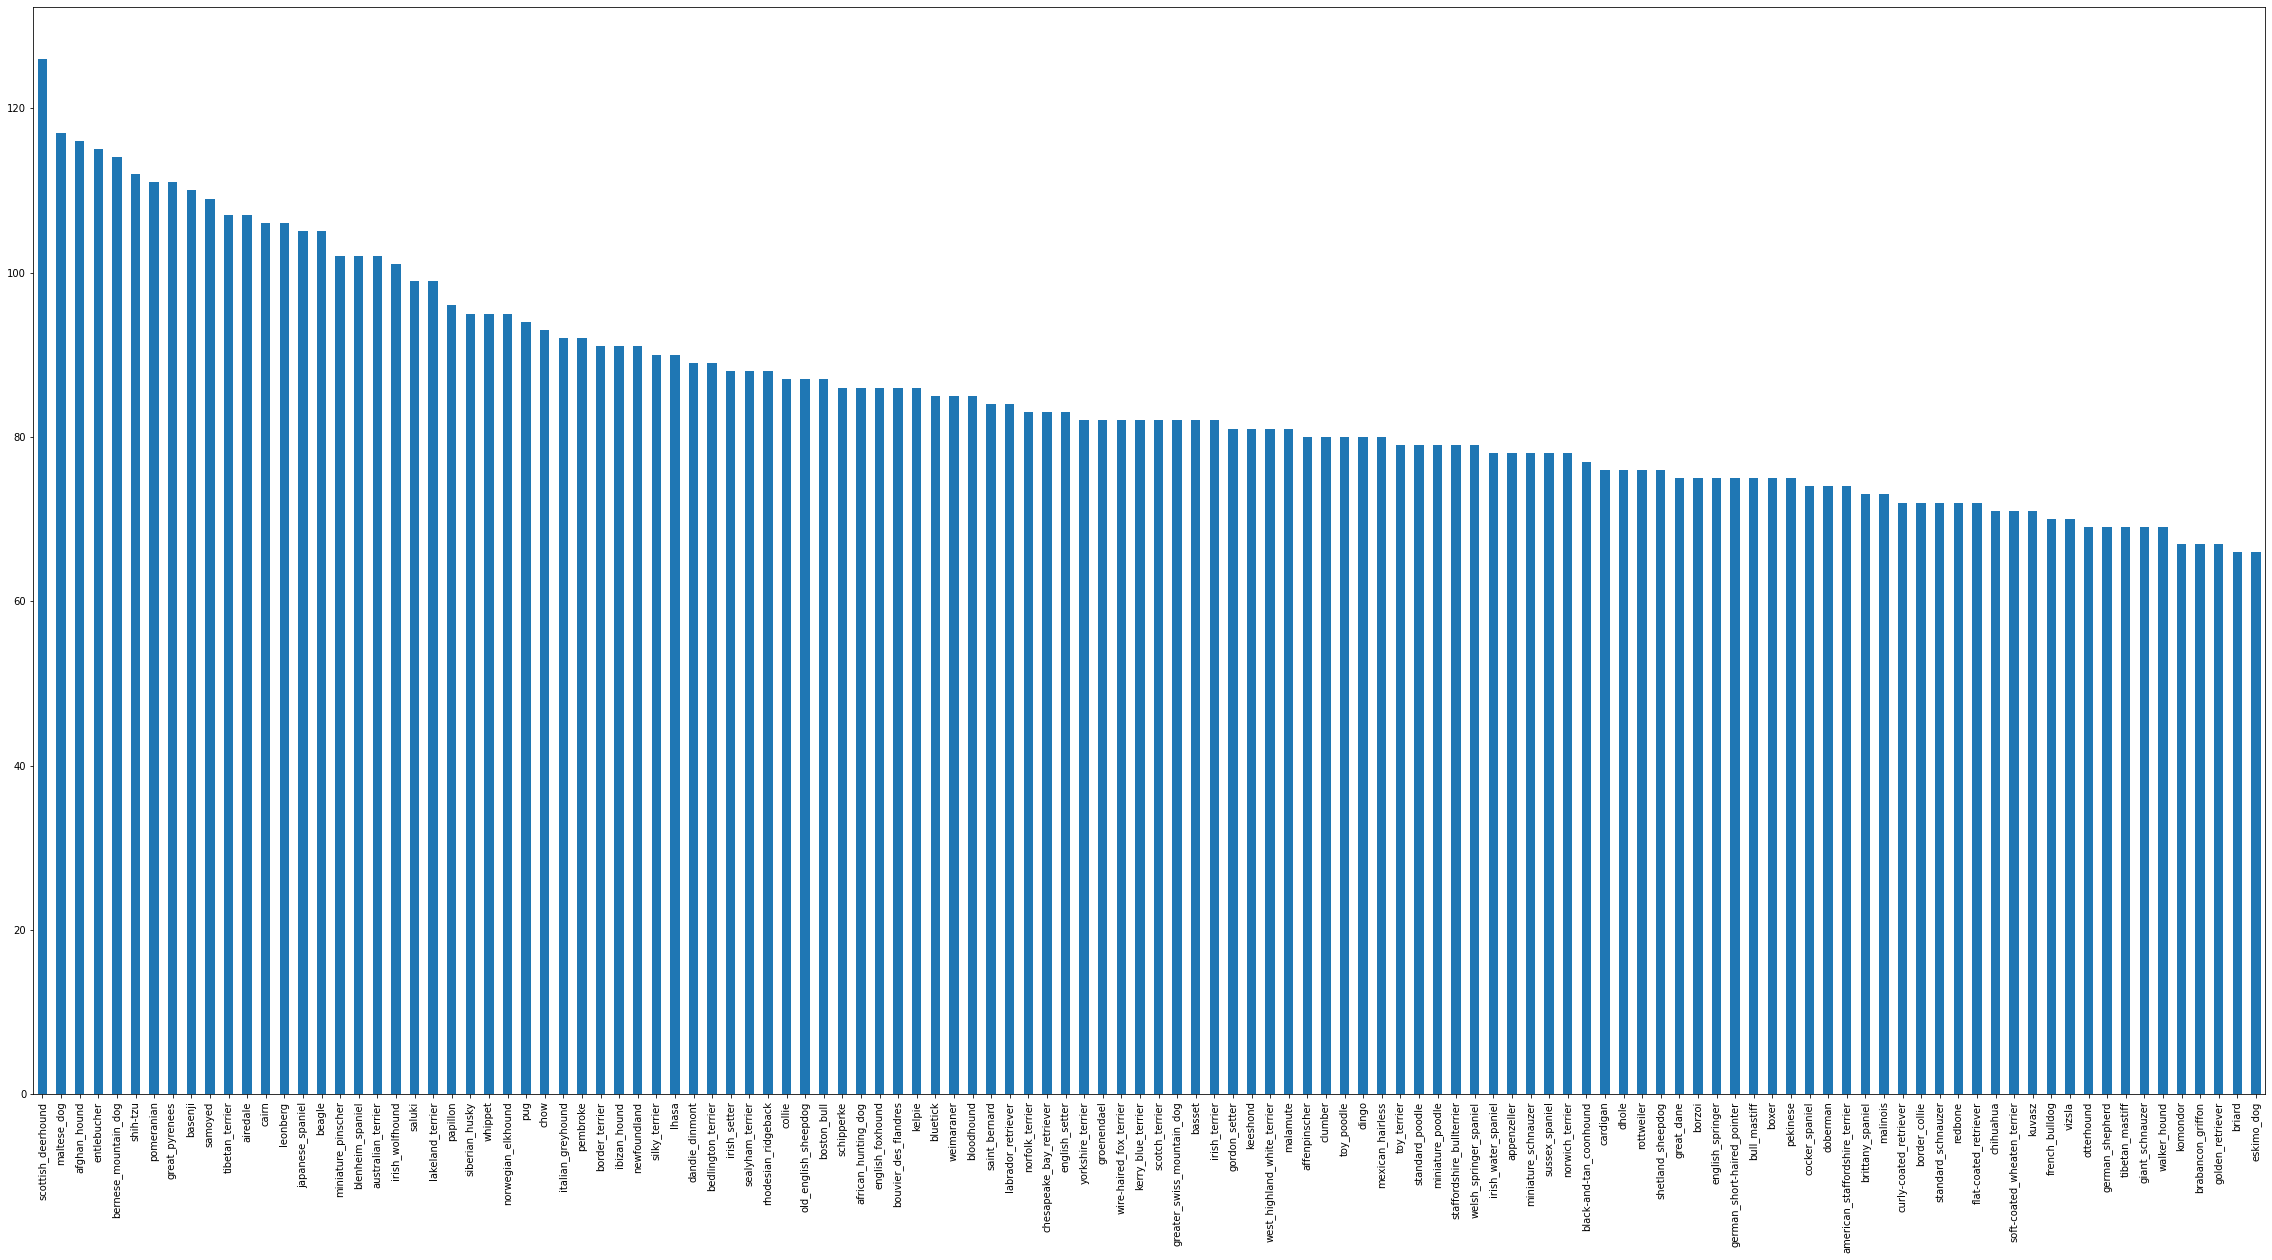

In [0]:
labels_csv["breed"].value_counts().plot.bar(figsize=(40, 20));

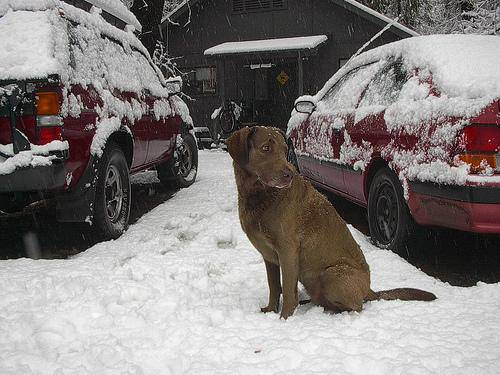

In [21]:
from IPython.display import Image
Image("/content/gdrive/My Drive/Dog Vision /train/fff43b07992508bc822f33d8ffd902ae.jpg")

In [0]:
len(labels_csv)

10222

In [0]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [15]:
import os
os.listdir("/content/gdrive/My Drive/Dog Vision /train")[ :10]

['df12a66b9b154c8bbe922846944e2ef2.jpg',
 'dc56a2b217661f2b3b521d8f58c1504b.jpg',
 'e6ff9171c960a31363798343982338c4.jpg',
 'e146cd8f43b445baab08b03548c425c4.jpg',
 'e208bfa575753207f240ed5619f93c41.jpg',
 'e1cacd82bce4a66313debf5e883fa806.jpg',
 'dccd2dd384090bfdf9105015167aed23.jpg',
 'e94234a15721850c8aaf3a94d2363f4f.jpg',
 'e6cdf82e11fd0ee6f73c55c0b4944616.jpg',
 'e64f734a28b021ded23cb8a25ebd5613.jpg']

In [18]:
import os 
if len(os.listdir("/content/gdrive/My Drive/Dog Vision /train")) == len(filenames):
  print("Filenames match actual amount of files! Proceed")
else:
  print("Filesnames do not matach. Check the directories")

Filenames match actual amount of files! Proceed


In [33]:
filenames = ["/content/gdrive/My Drive/Dog Vision /train" + fname  for fname in labels_csv["id"]]
filenames

['/content/gdrive/My Drive/Dog Vision /train000bec180eb18c7604dcecc8fe0dba07',
 '/content/gdrive/My Drive/Dog Vision /train001513dfcb2ffafc82cccf4d8bbaba97',
 '/content/gdrive/My Drive/Dog Vision /train001cdf01b096e06d78e9e5112d419397',
 '/content/gdrive/My Drive/Dog Vision /train00214f311d5d2247d5dfe4fe24b2303d',
 '/content/gdrive/My Drive/Dog Vision /train0021f9ceb3235effd7fcde7f7538ed62',
 '/content/gdrive/My Drive/Dog Vision /train002211c81b498ef88e1b40b9abf84e1d',
 '/content/gdrive/My Drive/Dog Vision /train00290d3e1fdd27226ba27a8ce248ce85',
 '/content/gdrive/My Drive/Dog Vision /train002a283a315af96eaea0e28e7163b21b',
 '/content/gdrive/My Drive/Dog Vision /train003df8b8a8b05244b1d920bb6cf451f9',
 '/content/gdrive/My Drive/Dog Vision /train0042188c895a2f14ef64a918ed9c7b64',
 '/content/gdrive/My Drive/Dog Vision /train004396df1acd0f1247b740ca2b14616e',
 '/content/gdrive/My Drive/Dog Vision /train0067dc3eab0b3c3ef0439477624d85d6',
 '/content/gdrive/My Drive/Dog Vision /train00693b8b

In [0]:
Image(filenames[9000])